In [1]:
!pip install hockey_rink==1.0.1

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from hockey_rink import Rink
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Linhac_df_keyed_20_games.csv')

### Creating zone labels

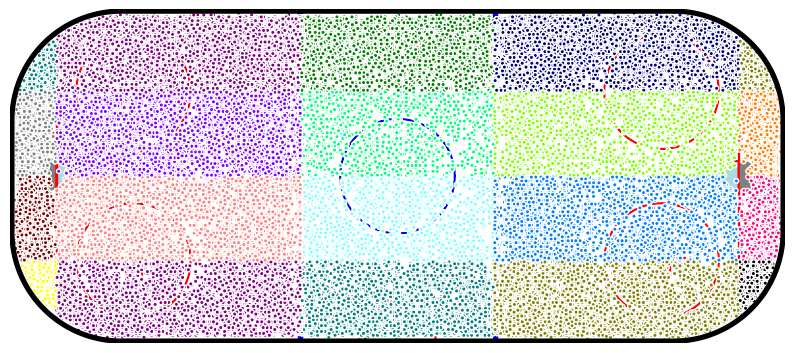

In [3]:
df['zone'] = None

for event in range(len(df)):
    row = df.loc[event]
    if row['xadjcoord'] < -89.0 and row['yadjcoord'] >= 22.0:
        df['zone'][event] = 'A1'
    elif -89.0 <= row['xadjcoord'] < -25.0 and row['yadjcoord'] >= 22.0:
        df['zone'][event] = 'A2'
    elif -25.0 <= row['xadjcoord'] < 25.0 and row['yadjcoord'] >= 22.0:
        df['zone'][event] = 'A3'
    elif 25.0 <= row['xadjcoord'] < 89.0 and row['yadjcoord'] >= 22.0:
        df['zone'][event] = 'A4'
    elif row['xadjcoord'] >= 89.0 and row['yadjcoord'] >= 22.0:
        df['zone'][event] = 'A5'
    elif row['xadjcoord'] < -89.0 and 22.0 > row['yadjcoord'] >= 0.0:
        df['zone'][event] = 'B1'
    elif -89.0 <= row['xadjcoord'] < -25.0 and 22.0 > row['yadjcoord'] >= 0.0:
        df['zone'][event] = 'B2'
    elif -25.0 <= row['xadjcoord'] < 25.0 and 22.0 > row['yadjcoord'] >= 0.0:
        df['zone'][event] = 'B3'
    elif 25.0 <= row['xadjcoord'] < 89.0 and 22.0 > row['yadjcoord'] >= 0.0:
        df['zone'][event] = 'B4'
    elif row['xadjcoord'] >= 89.0 and 22.0 > row['yadjcoord'] >= 0.0:
        df['zone'][event] = 'B5'
    elif row['xadjcoord'] < -89.0 and 0.0 > row['yadjcoord'] >= -22.0:
        df['zone'][event] = 'C1'
    elif -89.0 <= row['xadjcoord'] < -25.0 and 0.0 > row['yadjcoord'] >= -22.0:
        df['zone'][event] = 'C2'
    elif -25.0 <= row['xadjcoord'] < 25.0 and 0.0 > row['yadjcoord'] >= -22.0:
        df['zone'][event] = 'C3'
    elif 25.0 <= row['xadjcoord'] < 89.0 and 0.0 > row['yadjcoord'] >= -22.0:
        df['zone'][event] = 'C4'
    elif row['xadjcoord'] >= 89.0 and 0.0 > row['yadjcoord'] >= -22.0:
        df['zone'][event] = 'C5'
    elif row['xadjcoord'] < -89.0 and row['yadjcoord'] < -22.0:
        df['zone'][event] = 'D1'
    elif -89.0 <= row['xadjcoord'] < -25.0 and row['yadjcoord'] < -22.0:
        df['zone'][event] = 'D2'
    elif -25.0 <= row['xadjcoord'] < 25.0 and row['yadjcoord'] < -22.0:
        df['zone'][event] = 'D3'
    elif 25.0 <= row['xadjcoord'] < 89.0 and row['yadjcoord'] < -22.0:
        df['zone'][event] = 'D4'
    elif row['xadjcoord'] >= 89.0 and row['yadjcoord'] < -22.0:
        df['zone'][event] = 'D5'

zone = {
    'A1': (0.0, 0.5, 0.5, 1.0),
    'A2': (0.5, 0.0, 0.5, 1.0),
    'A3': (0.0, 0.5, 0.0, 1.0),
    'A4': (0.0, 0.0, 0.5, 1.0),
    'A5': (0.5, 0.5, 0.0, 1.0),
    'B1': (0.5, 0.5, 0.5, 1.0),
    'B2': (0.5, 0.0, 1.0, 1.0),
    'B3': (0.0, 1.0, 0.5, 1.0),
    'B4': (0.5, 1.0, 0.0, 1.0),
    'B5': (1.0, 0.5, 0.0, 1.0),
    'C1': (0.5, 0.0, 0.0, 1.0),
    'C2': (1.0, 0.5, 0.5, 1.0),
    'C3': (0.5, 1.0, 1.0, 1.0),
    'C4': (0.0, 0.5, 1.0, 1.0),
    'C5': (1.0, 0.0, 0.5, 1.0),
    'D1': (1.0, 1.0, 0.0, 1.0),
    'D2': (0.5, 0.0, 0.5, 1.0),
    'D3': (0.0, 0.5, 0.5, 1.0),
    'D4': (0.5, 0.5, 0.0, 1.0),
    'D5': (0.0, 0.0, 0.0, 1.0),
}

rink = Rink()
fig, ax = plt.subplots(figsize=(10, 8))
rink.scatter("xadjcoord", "yadjcoord", facecolor=df.zone.map(zone), s=10, edgecolor="white", data=df, ax=ax)

### Successful vs. unsuccessful events

Not sure how to qualify a successful event. 

In [6]:
goal_df = df[df['eventname'] == 'goal']
shot_df = df[df['eventname'] == 'shot']
suc_shot_df = shot_df[shot_df['outcome'] == 'successful']
fail_shot_df = shot_df[shot_df['outcome'] == 'failed']
assist_df = df[df['eventname'] == 'assist']
receptions_df = df[df['eventname'] == 'reception']
receptions_df = receptions_df[receptions_df['outcome'] == 'successful']

# count the frequency of each zone
goal_counts = goal_df['zone'].value_counts()

# calculate the percentage of each zone
goal_pct = goal_counts / len(goal_df) * 100

# print the result
print("goals")
print(goal_pct)

# count the frequency of each zone
suc_shot_counts = suc_shot_df['zone'].value_counts()

# calculate the percentage of each zone
suc_shot_pct = suc_shot_counts / len(suc_shot_df) * 100

# print the result
print("successful shots")
print(suc_shot_pct)

# count the frequency of each zone
fail_shot_counts = fail_shot_df['zone'].value_counts()

# calculate the percentage of each zone
fail_shot_pct = fail_shot_counts / len(fail_shot_df) * 100

# print the result
print("failed shots")
print(fail_shot_pct)

# count the frequency of each zone
assist_counts = assist_df['zone'].value_counts()

# calculate the percentage of each zone
assist_pct = assist_counts / len(assist_df) * 100

# print the result
print("assists")
print(assist_pct)

# count the frequency of each zone
receptions_counts = receptions_df['zone'].value_counts()

# calculate the percentage of each zone
receptions_pct = receptions_counts / len(receptions_df) * 100

# print the result
print("receptions")
print(receptions_pct)

goals
B4    48.113208
C4    39.622642
A4     3.773585
D4     2.830189
A3     1.886792
B2     0.943396
A2     0.943396
C3     0.943396
D2     0.943396
Name: zone, dtype: float64
successful shots
C4    31.277150
B4    31.016507
A4    16.681147
D4    13.727194
A3     1.824500
D3     1.737619
B3     0.868810
D2     0.521286
C5     0.521286
C3     0.434405
B5     0.434405
A2     0.347524
C2     0.260643
D1     0.173762
B2     0.173762
Name: zone, dtype: float64
failed shots
C4    32.252085
B4    29.564411
D4    19.091752
A4    18.813716
C5     0.185357
D5     0.092678
Name: zone, dtype: float64
assists
A4    21.276596
C4    19.148936
D4    15.425532
B4    12.234043
A2     4.787234
C2     4.255319
B5     3.723404
C3     3.191489
B3     2.659574
B1     2.127660
D2     2.127660
C5     2.127660
B2     1.595745
D3     1.595745
D5     1.063830
A5     1.063830
A1     0.531915
C1     0.531915
A3     0.531915
Name: zone, dtype: float64
receptions
A4    12.027173
D4    12.011734
D2     9.178632
A2   

In [9]:
goalie_zones_df = df[(df['zone'] == 'B4') | (df['zone'] == 'C4')]
goalie_zones_df = goalie_zones_df[goalie_zones_df['outcome'] == 'successful']

goalie_zones_counts = goalie_zones_df['eventname'].value_counts()

# calculate the percentage of each zone
goalie_zones_pct = goalie_zones_counts / len(goalie_zones_df) * 100
goalie_zones_failure_rate = (1-len(goalie_zones_df) / len(df))

# print the result
print("goalie zones")
print(goalie_zones_pct)
print('goalie zones event count:', len(goalie_zones_df))
print('failure rate', goalie_zones_failure_rate)

side_zones_df = df[(df['zone'] == 'A4') | (df['zone'] == 'D4')]
side_zones_df = side_zones_df[side_zones_df['outcome'] == 'successful']


side_zones_counts = side_zones_df['eventname'].value_counts()

# calculate the percentage of each zone
side_zones_pct = side_zones_counts / len(side_zones_df) * 100
side_zones_failure_rate = (1-len(side_zones_df) / len(df))


# print the result
print("side zones")
print(side_zones_pct)
print('side zones event count:', len(side_zones_df))
print('failure rate', side_zones_failure_rate)

goalie zones
reception           28.970688
pass                19.972733
shot                12.218814
lpr                 11.980232
controlledentry      6.152011
carry                5.589639
faceoff              4.345603
puckprotection       3.612815
block                2.283572
goal                 1.584867
assist               1.005453
penaltydrawn         0.579414
check                0.528289
soshot               0.511247
penalty              0.255624
dumpin               0.136333
sogoal               0.102249
controlledexit       0.085208
save                 0.068166
sopuckprotection     0.017042
Name: eventname, dtype: float64
goalie zones event count: 5868
failure rate 0.922831104272695
side zones
pass               27.254050
reception          24.606875
lpr                17.368629
controlledentry     7.925721
carry               6.305808
puckprotection      5.215330
block               4.614777
shot                2.765705
faceoff             1.438167
check               0

In [10]:
goalie_zones_df = df[(df['zone'] == 'B4') | (df['zone'] == 'C4')]
unique_events = goalie_zones_df['eventname'].unique()

ignore_events = ['faceoff', 'goal', 'penalty', 'assist', 'offside', 
                 'check', 'save']
for event in unique_events:
    if event in ignore_events:
        continue
    df_unique = goalie_zones_df[goalie_zones_df['eventname'] == event]
    df_suc = df_unique[df_unique['outcome'] == 'successful']
    df_fail = df_unique[df_unique['outcome'] == 'failed']
    print(event, ', success rate:', len(df_suc) / len(df_unique), ', fail_rate:', len(df_fail) / len(df_unique))

reception , success rate: 0.9582863585118376 , fail_rate: 0.04171364148816235
lpr , success rate: 0.687866927592955 , fail_rate: 0.312133072407045
shot , success rate: 0.5180635838150289 , fail_rate: 0.4819364161849711
carry , success rate: 1.0 , fail_rate: 0.0
controlledentry , success rate: 1.0 , fail_rate: 0.0
puckprotection , success rate: 0.5023696682464455 , fail_rate: 0.4976303317535545
pass , success rate: 0.7849966510381782 , fail_rate: 0.2143335565974548
penaltydrawn , success rate: 1.0 , fail_rate: 0.0
block , success rate: 0.7204301075268817 , fail_rate: 0.27956989247311825
dumpin , success rate: 0.8 , fail_rate: 0.2
soshot , success rate: 0.9375 , fail_rate: 0.0625
sogoal , success rate: 1.0 , fail_rate: 0.0
sopuckprotection , success rate: 0.3333333333333333 , fail_rate: 0.6666666666666666
controlledexit , success rate: 0.7142857142857143 , fail_rate: 0.2857142857142857


### Building out sequences

In [11]:
# finding each sequence

string_of_events = []
string_of_zones = []
len_of_events = []

current_string_events = []
current_string_zones = []
last_team = 0

for event in range(len(df)):
    current_event = df.iloc[event]
    if current_event['teamid'] == last_team:
        current_string_events.append(current_event['eventname'])
        current_string_zones.append(current_event['zone'])
    if last_team == 0:
        current_string_events.append(current_event['eventname'])
        current_string_zones.append(current_event['zone'])
        last_team = current_event['teamid']
    if current_event['teamid'] != last_team:
        string_of_events.append(current_string_events)
        len_of_events.append(len(current_string_events))
        string_of_zones.append(current_string_zones)
        current_string_events = []
        current_string_zones = []
        current_string_events.append(current_event['eventname'])
        current_string_zones.append(current_event['zone'])
        last_team = current_event['teamid']

In [12]:
# finding sequences that include a shot

string_of_events_include_shot = []
string_of_zones_include_shot = []
len_of_events_include_shot = []
event_before_shot = []
event_before_goal = []

string_of_events_no_shot = []
string_of_zones_no_shot = []
len_of_events_no_shot = []

zones_counter = 0
for string in string_of_events:
    if 'shot' in string:
        string_of_events_include_shot.append(string)
        len_of_events_include_shot.append(len(string))
        string_of_zones_include_shot.append(string_of_zones[zones_counter])
        zones_counter += 1


    else:
        string_of_events_no_shot.append(string)
        len_of_events_no_shot.append(len(string))
        string_of_zones_no_shot.append(string_of_zones[zones_counter])
        zones_counter += 1

    if string[-1] == 'shot':
        try:
            event_before_shot.append(string[-2])
        except:
            pass
    
    if string[-1] == 'goal':
        try:
            event_before_goal.append(string[-3])
        except:
            pass



In [13]:
print("Average length of sequence", np.mean(len_of_events))
print("Average length of sequence that includes a shot", np.mean(len_of_events_include_shot) - 1)
print("Average length of sequence that does not include a shot", np.mean(len_of_events_no_shot))
# minus one as a shot qualifies as one event and we are trying to get to the shot

Average length of sequence 3.336024217961655
Average length of sequence that includes a shot 4.976613657623948
Average length of sequence that does not include a shot 3.0626966836117164


In [14]:
sequence_stopper = []

for string in string_of_events_no_shot:
    sequence_stopper.append(string[-1])

In [15]:
# Flatten the list of lists
events_shot = [item for sublist in string_of_events_include_shot for item in sublist]
events_all = [item for sublist in string_of_events for item in sublist]

# Count the occurrences of each word
events_shot_counter = Counter(events_shot)
events_all_counter = Counter(events_all)
sequence_stopper_counter = Counter(sequence_stopper)
event_before_shot_counter = Counter(event_before_shot)
event_before_goal_counter = Counter(event_before_goal)

events_shot_counter, events_all_counter, sequence_stopper_counter, event_before_shot_counter, \
event_before_goal_counter

(Counter({'carry': 329,
          'controlledentry': 297,
          'puckprotection': 548,
          'pass': 3478,
          'reception': 3465,
          'lpr': 1642,
          'shot': 2230,
          'goal': 100,
          'check': 21,
          'block': 187,
          'faceoff': 182,
          'assist': 122,
          'controlledexit': 115,
          'dumpout': 11,
          'dumpin': 34,
          'penaltydrawn': 10,
          'save': 3,
          'rebound': 3,
          'penalty': 1}),
 Counter({'faceoff': 2308,
          'lpr': 15412,
          'pass': 17455,
          'reception': 13414,
          'carry': 4375,
          'controlledexit': 3962,
          'dumpin': 1173,
          'block': 3423,
          'controlledentryagainst': 1609,
          'controlledentry': 1699,
          'puckprotection': 3971,
          'shot': 2230,
          'save': 1045,
          'rebound': 614,
          'dumpout': 1382,
          'check': 1120,
          'penaltydrawn': 131,
          'penalty': 

### Bar graphs

In [16]:
def bargraph(counter, graph_title):

    # Extract the events and their counts as separate lists
    events = list(counter.keys())
    counts = list(counter.values())

    # Create a larger plot using matplotlib
    plt.figure(figsize=(10,6))

    # Create a bar graph
    plt.bar(events, counts)

    # Add axis labels and a title
    plt.xlabel('Event')
    plt.ylabel('Count')
    plt.title(graph_title)

    # Rotate the x-axis labels by 45 degrees
    plt.xticks(rotation=90)

    # Show the plot
    return plt.show()

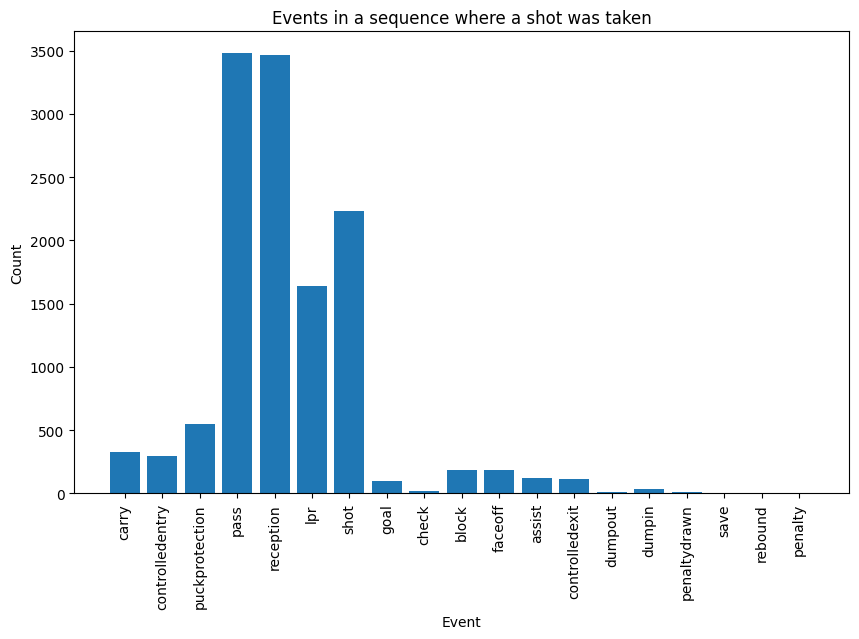

In [17]:
bargraph(events_shot_counter, 'Events in a sequence where a shot was taken')

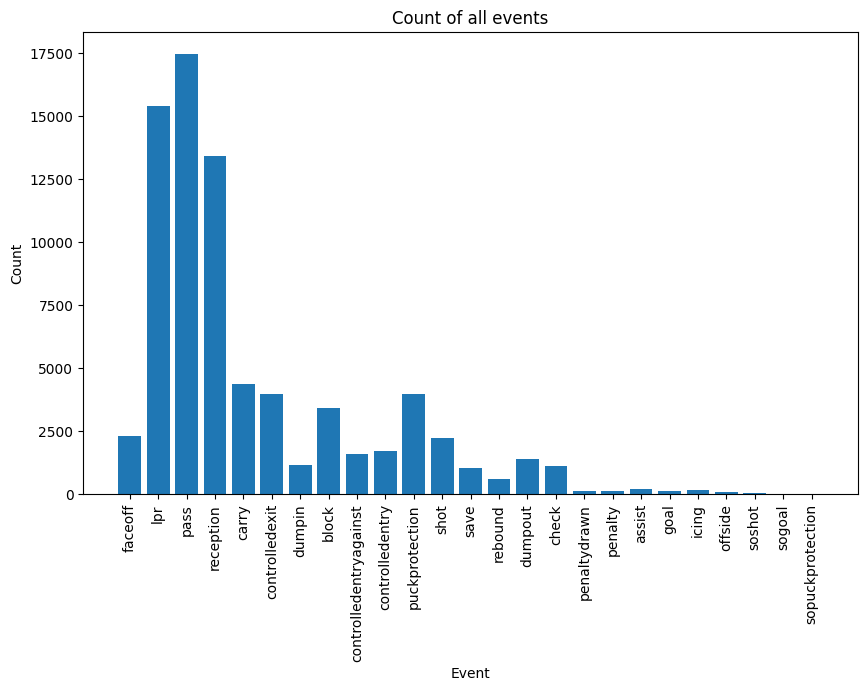

In [18]:
bargraph(events_all_counter, 'Count of all events')

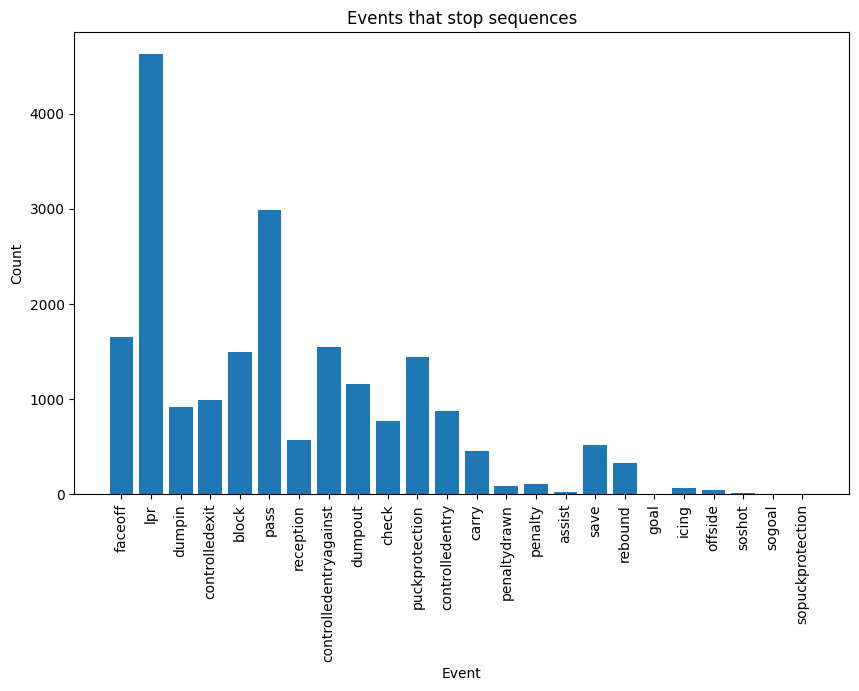

In [19]:
bargraph(sequence_stopper_counter, 'Events that stop sequences')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=52c67ded-f4f7-4855-8de6-8871afe84448' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>